In [ ]:
import pandas as pd
import numpy as np

## 1. Data Preparation

In [ ]:
airports = pd.read_csv('/content/drive/MyDrive/Deloitte Case Study/airports.csv')
airports.head()

,name,continent,iso_country,iata_code,coordinates
0,Brussels Airport,EU,BE,BRU,"50.901401519800004,4.48443984985"
1,Frankfurt am Main Airport,EU,DE,FRA,"50.033333,8.570556"
2,DÃ¼sseldorf Airport,EU,DE,DUS,"51.289501,6.76678"
3,Munich Airport,EU,DE,MUC,"48.353802,11.7861"
4,Stuttgart Airport,EU,DE,STR,"48.689899444599995,9.22196006775"


In [ ]:
airports_terms_of_lease = pd.read_csv('/content/drive/MyDrive/Deloitte Case Study/airports_terms_of_lease.csv')
airports_terms_of_lease = airports_terms_of_lease.squeeze().str.split(pat=',', expand=True)
airports_terms_of_lease.columns = ['Airport', 'sqm_of_store', 'price_per_sqm_month']
airports_terms_of_lease['sqm_of_store'] = airports_terms_of_lease['sqm_of_store'].astype(int)
airports_terms_of_lease['price_per_sqm_month'] = airports_terms_of_lease['price_per_sqm_month'].astype(int)
airports_terms_of_lease['annual_cost'] = airports_terms_of_lease.apply(lambda row: row.sqm_of_store * row.price_per_sqm_month * 12, axis=1)
airports_terms_of_lease.head()

,Airport,sqm_of_store,price_per_sqm_month,annual_cost
0,DFW,42,21,10584
1,DXB,151,23,41676
2,EZE,276,23,76176
3,HKG,150,28,50400
4,HND,117,23,32292


In [ ]:
# Read csv files 
passengersEU = pd.read_csv('/content/drive/MyDrive/Deloitte Case Study/passengersEU.csv')
passengersWW = pd.read_csv('/content/drive/MyDrive/Deloitte Case Study/passengersWW.csv')
# Check duplicates
#print(passengersEU.duplicated().any())
#print(passengersWW.duplicated().any())
# Remove duplicates
passengersWW = passengersWW.drop_duplicates()
#print(passengersWW.duplicated().any())

In [ ]:
# make date format consistent
passengersEU['birth_date'] = pd.to_datetime(passengersEU['birth_date'])
passengersWW['birth_date'] = pd.to_datetime(passengersWW['birth_date'])

In [ ]:
# Generate a age column based on the birth_date column
from datetime import datetime, date
dataset_made_time = pd.to_datetime('31/12/2019')
def calculate_age(born):
  today = pd.to_datetime('31/12/2019')
  return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

passengersEU['age'] = passengersEU['birth_date'].apply(calculate_age)
passengersWW['age'] = passengersWW['birth_date'].apply(calculate_age)

In [ ]:
# lower case in luggage column
passengersEU['luggage'] = passengersEU['luggage'].str.lower()
passengersWW['luggage'] = passengersWW['luggage'].str.lower()
# use regex to retrieve the amount and the unit of luggage
df1 = passengersEU['luggage'].str.extract(r'(\d*\.?\d+)\s?(\w+)')
df2 = passengersWW['luggage'].str.extract(r'(\d*\.?\d+)\s?(\w+)')
df1.columns = ['num','unit']
df2.columns = ['num','unit']
df1['num'] = df1['num'].astype(int)
df2['num'] = df2['num'].astype(int)

# Got the average density = 1.005697 by leverage groupby and mean
# print(df1.groupby('unit').mean())

def convert(row):
    if row['unit']=='l':
        return row['num'] 
    if row['unit']=='lbs':
        return round(row['num'] * 0.45)
    if row['unit']=='kg':
      return row['num']

df1['converted']=df1.apply(convert,axis=1)
df2['converted']=df2.apply(convert,axis=1)

passengersEU['luggage'] = df1['converted']
passengersWW['luggage'] = df2['converted']

In [ ]:
#passengersWW.info()

def airlines(flight_number):
  if not (type(flight_number) is float):
    return flight_number.split()[0]
  else:
    return flight_number

passengersEU['flight_number_1'] = passengersEU['flight_number_1'].apply(airlines)
passengersEU['flight_number_2'] = passengersEU['flight_number_2'].apply(airlines)
passengersWW['flight_number_1'] = passengersWW['flight_number_1'].apply(airlines)
passengersWW['flight_number_2'] = passengersWW['flight_number_2'].apply(airlines)

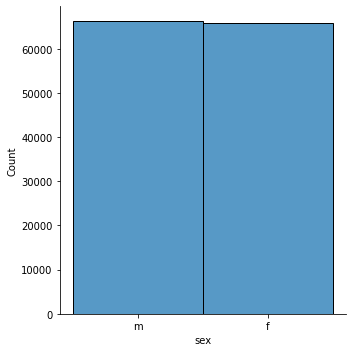

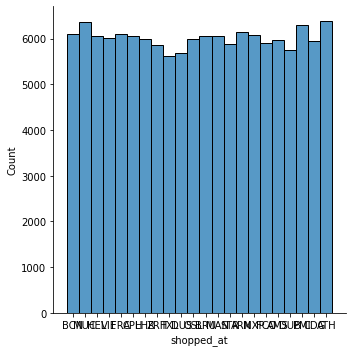

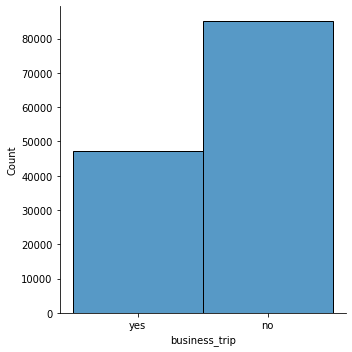

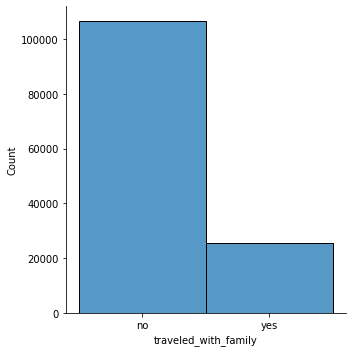

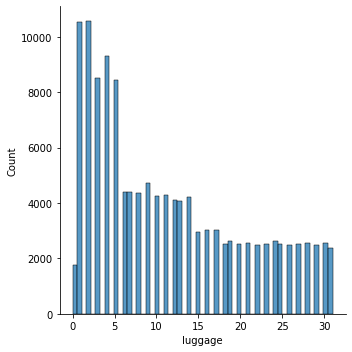

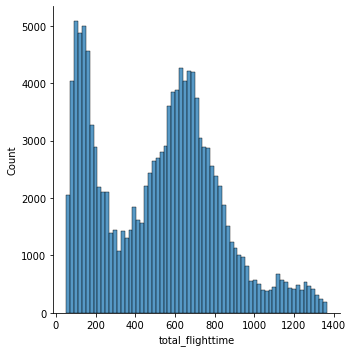

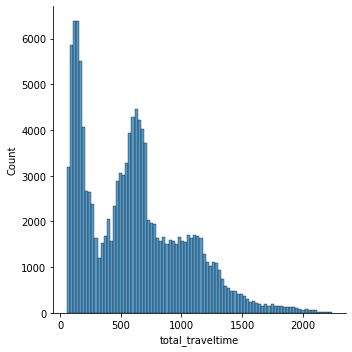

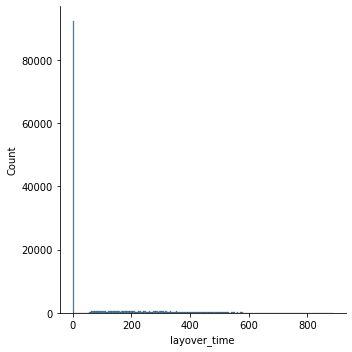

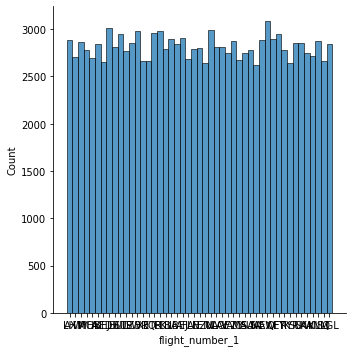

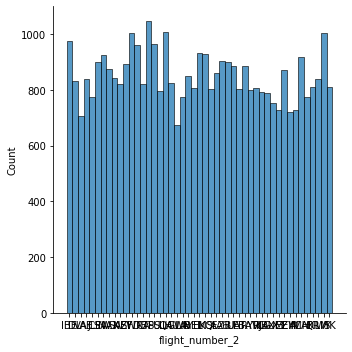

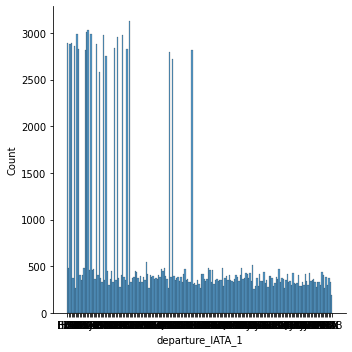

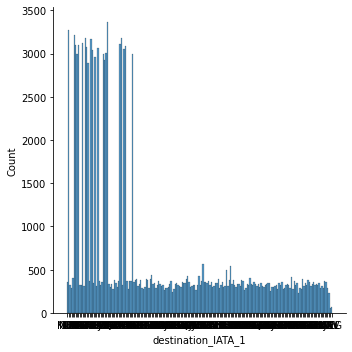

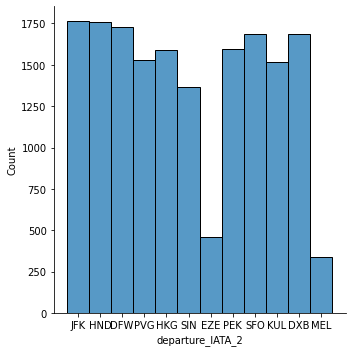

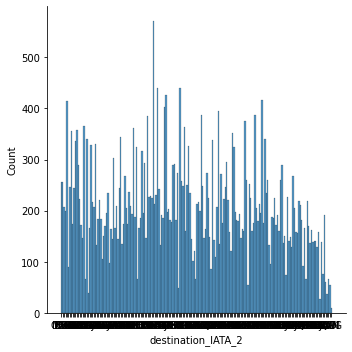

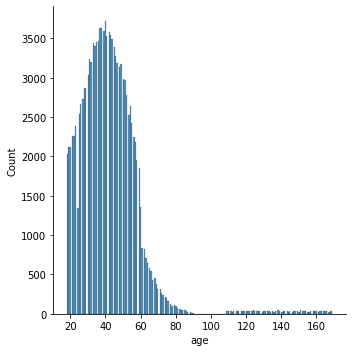

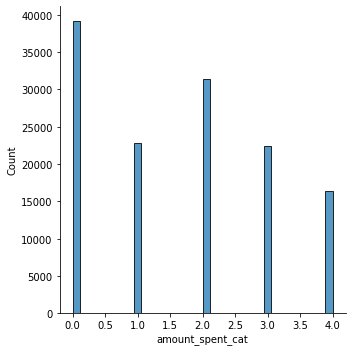

In [ ]:
# # Check data distribution for passengersEU dataset, find out outliers

import seaborn as sns

sns.displot(passengersEU, x="sex", discrete=True)
sns.displot(passengersEU, x="shopped_at", discrete=True)
sns.displot(passengersEU, x="business_trip", discrete=True)
sns.displot(passengersEU, x="traveled_with_family", discrete=True)
sns.displot(passengersEU, x="luggage")
sns.displot(passengersEU, x="total_flighttime")
sns.displot(passengersEU, x="total_traveltime")
sns.displot(passengersEU, x="layover_time")
sns.displot(passengersEU, x="flight_number_1", discrete=True)
sns.displot(passengersEU, x="flight_number_2", discrete=True)
sns.displot(passengersEU, x="departure_IATA_1", discrete=True)
sns.displot(passengersEU, x="destination_IATA_1", discrete=True)
sns.displot(passengersWW, x="departure_IATA_2", discrete=True)
sns.displot(passengersEU, x="destination_IATA_2", discrete=True)
sns.displot(passengersEU, x="age")
sns.displot(passengersEU, x="amount_spent_cat")

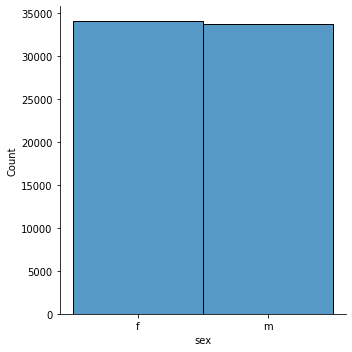

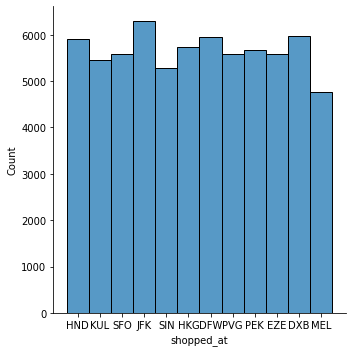

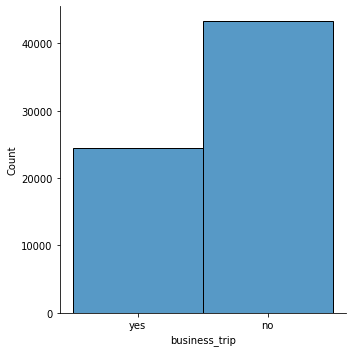

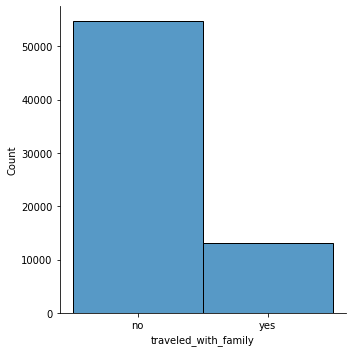

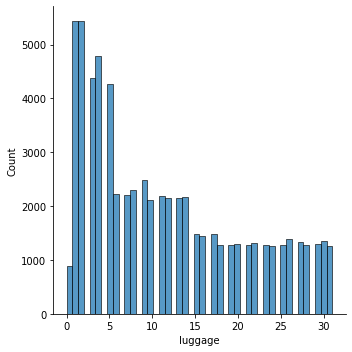

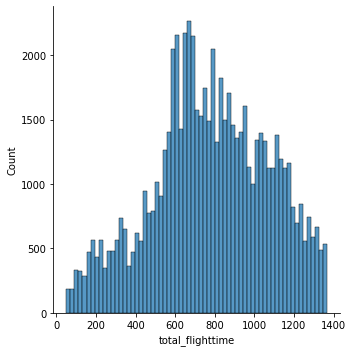

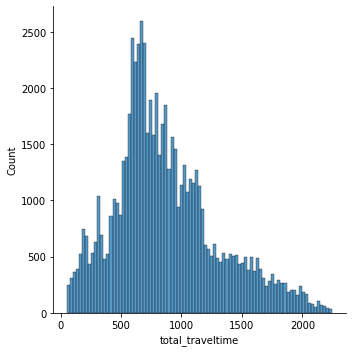

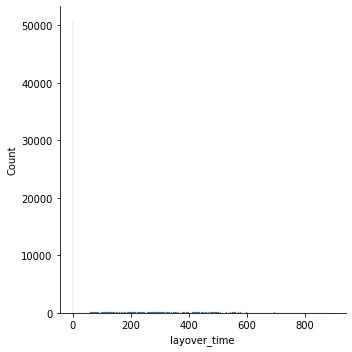

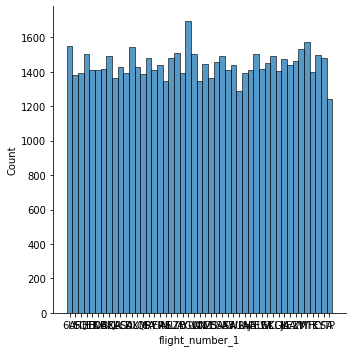

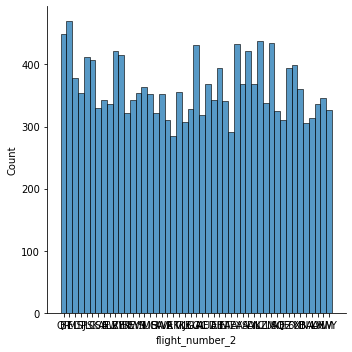

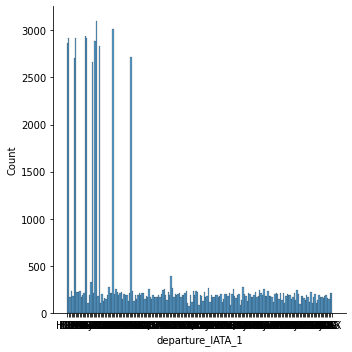

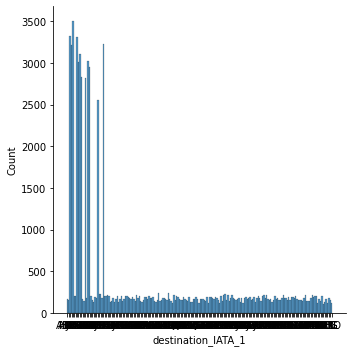

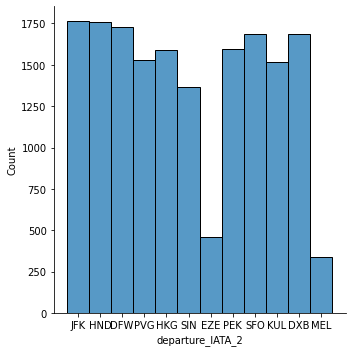

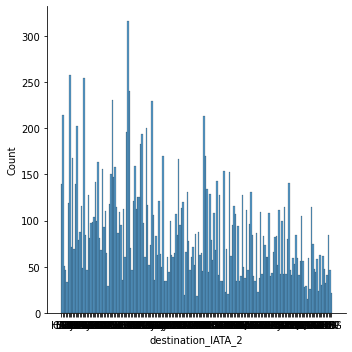

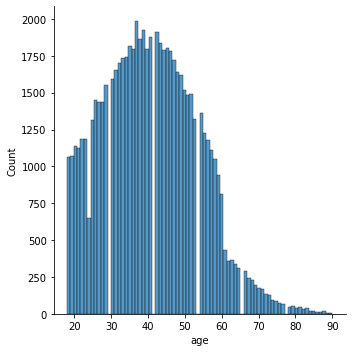

In [ ]:
# # Check data distribution for passengersWW dataset, find out outliers

sns.displot(passengersWW, x="sex", discrete=True)
sns.displot(passengersWW, x="shopped_at", discrete=True)
sns.displot(passengersWW, x="business_trip", discrete=True)
sns.displot(passengersWW, x="traveled_with_family", discrete=True)
sns.displot(passengersWW, x="luggage")
sns.displot(passengersWW, x="total_flighttime")
sns.displot(passengersWW, x="total_traveltime")
sns.displot(passengersWW, x="layover_time")
sns.displot(passengersWW, x="flight_number_1", discrete=True)
sns.displot(passengersWW, x="flight_number_2", discrete=True)
sns.displot(passengersWW, x="departure_IATA_1", discrete=True)
sns.displot(passengersWW, x="destination_IATA_1", discrete=True)
sns.displot(passengersWW, x="departure_IATA_2", discrete=True)
sns.displot(passengersWW, x="destination_IATA_2", discrete=True)
sns.displot(passengersWW, x="age")

In [ ]:
# Replace all non-relevant values with NAN

temp = []

for item in passengersEU['age']:
  if item > 100:
    temp.append(None)
  else:
    temp.append(item)
    
passengersEU['age'] = temp

In [ ]:
# Check NA values percentage in EU dataset
# null_value_stats_passengersEU = passengersEU.isnull().sum(axis=0)
# print(null_value_stats_passengersEU[null_value_stats_passengersEU != 0])


print('Percent of missing "age" in EU is %.2f%%' %((passengersEU['age'].isnull().sum()/passengersEU.shape[0])*100))
print('Percent of missing "departure_IATA_1" in EU is %.2f%%' %((passengersEU['departure_IATA_1'].isnull().sum()/passengersEU.shape[0])*100))
print('Percent of missing "destination_IATA_1" in EU is %.2f%%' %((passengersEU['destination_IATA_1'].isnull().sum()/passengersEU.shape[0])*100))
print('Percent of missing "flight_number_2" in EU is %.2f%%' %((passengersEU['flight_number_2'].isnull().sum()/passengersEU.shape[0])*100))
print('Percent of missing "departure_IATA_2" in EU is %.2f%%' %((passengersEU['departure_IATA_2'].isnull().sum()/passengersEU.shape[0])*100))
print('Percent of missing "destination_IATA_2" in EU is %.2f%%' %((passengersEU['destination_IATA_2'].isnull().sum()/passengersEU.shape[0])*100))


Percent of missing "age" in EU is 1.53%
Percent of missing "departure_IATA_1" in EU is 4.77%
Percent of missing "destination_IATA_1" in EU is 6.09%
Percent of missing "flight_number_2" in EU is 69.78%
Percent of missing "departure_IATA_2" in EU is 75.87%
Percent of missing "destination_IATA_2" in EU is 69.78%


In [ ]:
# Separate features and label variable:
X = passengersEU.drop(['amount_spent_cat', 'birth_date', 'name'], axis=1) # 'flight_number_2', 'departure_IATA_2', 'destination_IATA_2'
y = passengersEU.amount_spent_cat
# Check column orders consistency in two tables
passengersWW = passengersWW.drop(['birth_date', 'name'], axis=1)
(X.columns == passengersWW.columns).all()

# Fill NA with some number way out of their distributions, so the model would be able to easily distinguish between them and take it into account.
X.fillna(-999, inplace=True)
y.fillna(-999, inplace=True)
passengersWW.fillna(-999, inplace=True)

In [ ]:
# Extract categorical feature index
print(X.dtypes)
categorical_features_indices = np.where(X.dtypes != float)[0]
categorical_features_indices

sex                      object
shopped_at               object
business_trip            object
traveled_with_family     object
luggage                   int64
total_flighttime        float64
total_traveltime        float64
layover_time            float64
flight_number_1          object
departure_IATA_1         object
destination_IATA_1       object
flight_number_2          object
departure_IATA_2         object
destination_IATA_2       object
age                     float64
dtype: object


array([ 0,  1,  2,  3,  4,  8,  9, 10, 11, 12, 13])

In [ ]:
# Split train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

## Logistic Regression



In [ ]:
# # Hotencoding categorical features when we use logistic regression!

# from sklearn.preprocessing import OneHotEncoder

# onehot_encoder = OneHotEncoder(categories='auto', handle_unknown='ignore')

# onehot_encoder.fit(X_train)
# X_train = onehot_encoder.transform(X_train)
# X_test = onehot_encoder.transform(X_test)
# passengersWW = onehot_encoder.transform(passengersWW)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# # define the model
# model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1.0, max_iter=700)
# # fit on the training set
# model.fit(X_train, y_train)
# # predict on test set
# yhat = model.predict(X_test)
# # evaluate predictions
# accuracy = accuracy_score(y_test, yhat)
# print('Accuracy: %.2f' % (accuracy*100))

## 2. Catboost 

In [ ]:
%%capture
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets
!pip install hyperopt

In [ ]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score

In [ ]:
params = {
    'iterations': 5000,
    'learning_rate': 0.1,
    'eval_metric': metrics.Accuracy(),
    'random_seed': 42,
    'task_type': "GPU",
    'logging_level': 'Silent',
    'devices': '0:1',
    'loss_function': 'MultiClass',
    'use_best_model': False
}
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validate_pool = Pool(X_test, y_test, cat_features=categorical_features_indices)

In [ ]:
model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=validate_pool)

# cv_params = model.get_params()
# cv_params.update({
#     'loss_function': 'MultiClass'
# })
# cv_data = cv(
#     validate_pool,
#     cv_params
# )

# print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
#     np.max(cv_data['test-Accuracy-mean']),
#     cv_data['test-Accuracy-std'][np.argmax(cv_data['test-Accuracy-mean'])],
#     np.argmax(cv_data['test-Accuracy-mean'])
# ))

In [ ]:
best_model_params = params.copy()
best_model_params.update({
    'use_best_model': True
})
best_model = CatBoostClassifier(**best_model_params)
best_model.fit(train_pool, eval_set=validate_pool);

print('Simple model validation accuracy: {:.4}'.format(
    accuracy_score(y_test, model.predict(X_test))
))
print('')

print('Best model validation accuracy: {:.4}'.format(
    accuracy_score(y_test, best_model.predict(X_test))
))

Simple model validation accuracy: 0.8654

Best model validation accuracy: 0.8739


In [ ]:
predictions = model.predict(passengersWW)
passengersWW['predictions'] = predictions

In [ ]:
# Save model 
model.save_model('catboost_model.dump')

## Calculate expected profit and rank airports 

In [25]:
# Use median number in a category to represent expected revenue
def convert(category):
    if category == 0:
      return 5
    elif category == 1:
      return 30
    elif category == 2:
      return 100
    elif category == 3:
      return 225
    else:
      return 400
passengersWW['revenue'] = passengersWW['predictions'].apply(convert)
revenue_gb =passengersWW.groupby('shopped_at').sum()['revenue']
revenue_df = revenue_gb.to_frame()

In [26]:
# Merge revenue table and leasing cost table
merged = pd.merge(airports_terms_of_lease, revenue_df, left_on='Airport', right_on='shopped_at') 
merged = pd.merge(airports, merged, left_on='iata_code', right_on='Airport')
merged['expected_profit'] = merged.revenue - merged.annual_cost
merged.sort_values(by='expected_profit', ascending=False, inplace=True)
merged

,name,continent,iso_country,iata_code,coordinates,Airport,sqm_of_store,price_per_sqm_month,annual_cost,revenue,expected_profit
0,Dallas Fort Worth International Airport,NH,US,DFW,"32.896801,-97.038002",DFW,42,21,10584,639720,629136
1,John F Kennedy International Airport,NH,US,JFK,"40.63980103,-73.77890015",JFK,97,27,31428,617555,586127
4,Tokyo Haneda International Airport,AS,JP,HND,"35.552299,139.779999",HND,117,23,32292,615130,582838
11,Shanghai Pudong International Airport,AS,CN,PVG,"31.143400192260742,121.80500030517578",PVG,59,19,13452,574945,561493
10,Beijing Capital International Airport,AS,CN,PEK,"40.080101013183594,116.58499908447266",PEK,89,17,18156,573005,554849
2,San Francisco International Airport,NH,US,SFO,"37.61899948120117,-122.375",SFO,181,28,60816,613870,553054
7,Kuala Lumpur International Airport,AS,MY,KUL,"2.745579957962,101.70999908447",KUL,119,19,27132,580135,553003
3,Dubai International Airport,AS,AE,DXB,"25.2527999878,55.3643989563",DXB,151,23,41676,586845,545169
9,Melbourne International Airport,OC,AU,MEL,"-37.673302,144.843002",MEL,207,27,67068,604735,537667
6,Hong Kong International Airport,AS,HK,HKG,"22.308901,113.915001",HKG,150,28,50400,585800,535400


## Criteria

In [ ]:
feature_importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

luggage: 22.64288468834591
total_traveltime: 11.090619509977321
departure_IATA_1: 11.029668720599837
destination_IATA_1: 8.113033829290009
layover_time: 7.490788102933467
age: 7.431613629171588
flight_number_1: 5.86628208280051
business_trip: 5.6603298837093154
total_flighttime: 4.398110464531971
shopped_at: 4.391730899738346
traveled_with_family: 3.9145025645962988
flight_number_2: 2.8593314385655075
destination_IATA_2: 2.3381455131714053
departure_IATA_2: 1.5425387955713468
sex: 1.2304198769971655


In [ ]:
import matplotlib.pyplot as plt
temp = passengersWW['total_traveltime']//60
passengersWW['total_traveltime'] = temp.round()
temp = passengersWW['layover_time']//60
passengersWW['layover_time'] = temp.round()
temp = passengersWW['total_flighttime']//60
passengersWW['total_flighttime'] = temp.round()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


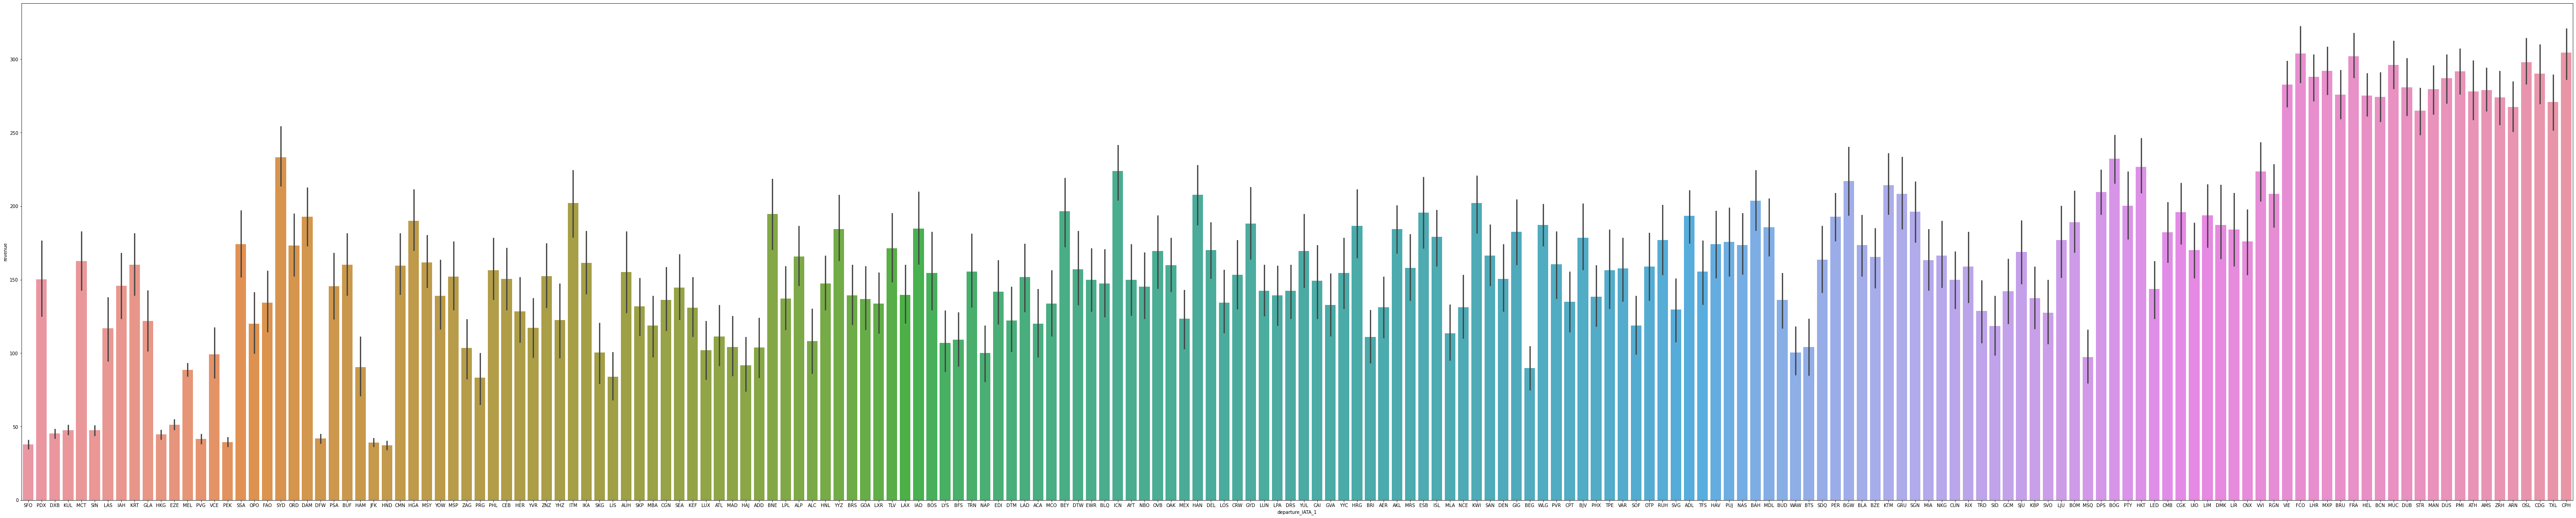

In [ ]:
passengersWW = passengersWW.sort_values(by='layover_time', ascending=True, inplace=False)
plt.figure(figsize = (100, 20))
sns.barplot('layover_time', 'revenue', data=passengersWW)